<a href="https://colab.research.google.com/github/castrigno22/geopandas/blob/main/EsercitazioneGeopandas5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 24.2 MB/s 
     |████████████████████████████████| 15.4 MB 48 kB/s 
     |████████████████████████████████| 6.3 MB 29.6 MB/s 


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 4.2 MB/s 


In [ ]:
%matplotlib inline
import contextily
import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bikes = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/bike_ciclabili.zip")
bikes

,FID,NOME,COD_AREA,CLASSIF,DCLASSIF,TIPO,DTIPO,TIPO_AREA,DTIPO_AREA,COD_NOME,geometry
0,5,Parco Alpi Orobie Valtellinesi,18,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,18:Parco Alpi Orobie Valtellinesi,"POLYGON ((587577.037 5107497.548, 587615.036 5..."
1,6,Parco Alpi Orobie Bergamasche,17,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,17:Parco Alpi Orobie Bergamasche,"POLYGON ((586196.195 5100871.221, 586351.566 5..."
2,7,Parco Campo dei Fiori,9,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,9: Parco Campo dei Fiori,"POLYGON ((486537.216 5078441.081, 486530.341 5..."
3,8,Parco Alto Garda Bresciano,7,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,7: Parco Alto Garda Bresciano,"POLYGON ((617860.123 5053114.432, 617863.431 5..."
4,1,National Park (CH),99,0,Non valutato,1,Parco Nazionale,3,Area extranazionale,99:National Park (CH),"POLYGON ((584084.298 5161019.100, 583763.056 5..."
5,2,Parco Nazionale dello Stelvio (TN-BZ),97,0,Non valutato,1,Parco Nazionale,2,Area extraregionale,97:Parco Nazionale dello Stelvio (TN-BZ),"POLYGON ((611429.112 5154022.734, 612080.475 5..."
6,3,Parco Nazionale dello Stelvio,98,0,Non valutato,1,Parco Nazionale,1,Area Regionale,98:Parco Nazionale dello Stelvio,"POLYGON ((584084.298 5161019.100, 584083.048 5..."
7,4,Parco Adamello,4,23,Parco forestale e montano,2,Parco Regionale,1,Area Regionale,4: Parco Adamello,"POLYGON ((617719.939 5125721.072, 617744.313 5..."
8,9,Parco Adda Nord,5,45,Parco fluviale e di cintura metropolitana,2,Parco Regionale,1,Area Regionale,5: Parco Adda Nord,"POLYGON ((533258.682 5067541.607, 533248.433 5..."
9,15,Parco Valle del Ticino,1,1245,"Parco agricolo,forestale,fluviale e di cintura...",2,Parco Regionale,1,Area Regionale,1: Parco Valle del Ticino,"POLYGON ((476666.268 5067282.167, 476899.067 5..."


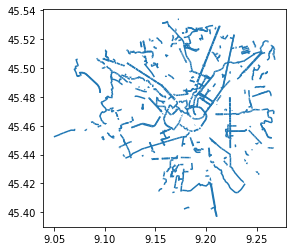

In [ ]:
bikes.plot()

In [ ]:
quartieriM = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
quartieriM

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


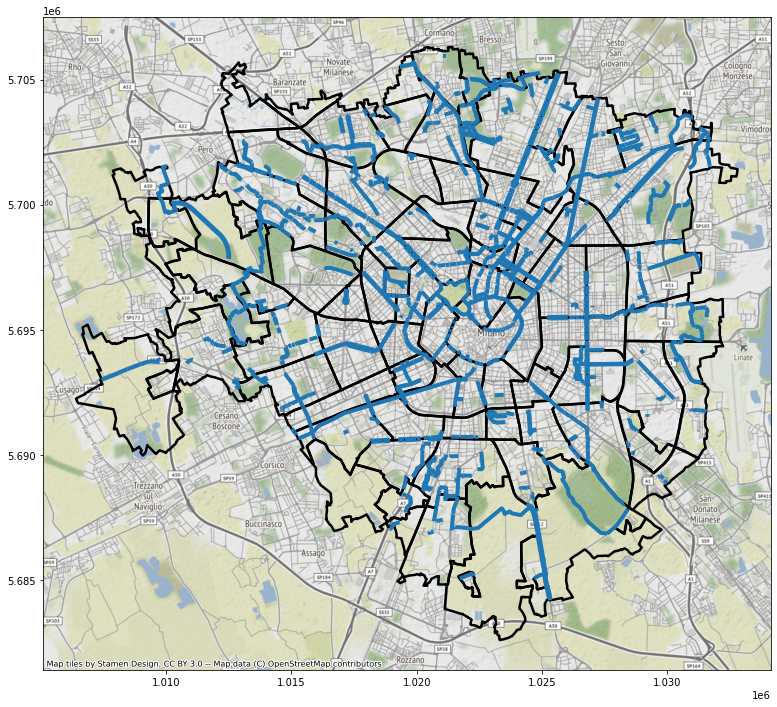

In [ ]:
ax= quartieriM.to_crs(epsg=3857).plot(figsize=(24,12),facecolor="none",edgecolor="k",linewidth=2.5)
bikes.to_crs(epsg=3857).plot(ax=ax,linewidth=4)
contextily.add_basemap(ax)

In [ ]:
quartieriM["Shape_Area"].min()

188863.44696488022

In [ ]:
minQuart=quartieriM[quartieriM["Shape_Area"]==quartieriM["Shape_Area"].min()]
minQuart

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,188863.446965,135,"POLYGON ((9.18364 45.40122, 9.18442 45.40004, ..."


In [ ]:
maxQuart=quartieriM[quartieriM["Shape_Area"]==quartieriM["Shape_Area"].max()]
maxQuart

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
55,85,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144,"POLYGON ((9.21711 45.43187, 9.21733 45.43160, ..."


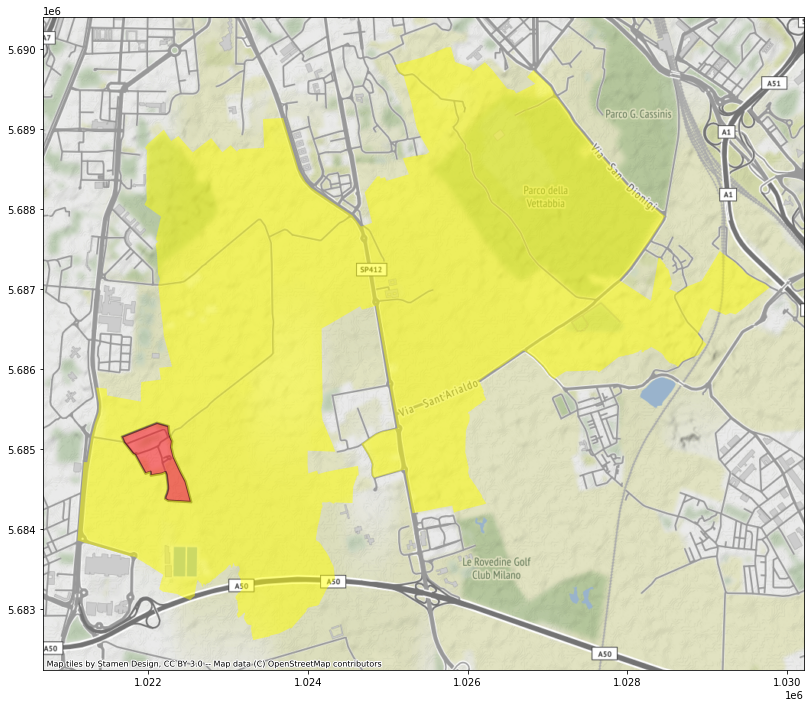

In [ ]:
ax= minQuart.to_crs(epsg=3857).plot(figsize=(24,12),facecolor="red",alpha=0.5,edgecolor="k",linewidth=2.5)
maxQuart.to_crs(epsg=3857).plot(ax=ax,facecolor="yellow",alpha=0.5)
contextily.add_basemap(ax)

In [ ]:
affori=quartieriM[quartieriM["NIL"]=="AFFORI"]
affori

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."


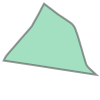

In [ ]:
sq=affori.geometry.squeeze()
sq

In [ ]:
bikes_affori=bikes[bikes.intersects(sq)]
bikes_affori

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
32,9039,1088,VIALE ENRICO FERMI,None,urbana,percorso promiscuo - attraversamento,attraversamento,bidirezionale,attraversamento - generico,36.0,"LINESTRING (9.17915 45.51407, 9.17960 45.51413)"
252,9299,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,172.0,"LINESTRING (9.18299 45.50597, 9.18272 45.50617..."
255,9302,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,211.0,"LINESTRING (9.18176 45.50722, 9.18153 45.50742..."
294,9342,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,455.0,"LINESTRING (9.18045 45.50883, 9.18043 45.50890..."
668,9716,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,33.0,"LINESTRING (9.17925 45.51284, 9.17884 45.51277)"
...,...,...,...,...,...,...,...,...,...,...,...
2982,12754,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,8.0,"LINESTRING (9.17701 45.50897, 9.17706 45.50891)"
2983,12755,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,46.0,"LINESTRING (9.17675 45.50935, 9.17701 45.50897)"
2984,12756,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,20.0,"LINESTRING (9.17664 45.50951, 9.17675 45.50935)"
2985,12757,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,40.0,"LINESTRING (9.17641 45.50983, 9.17664 45.50951)"


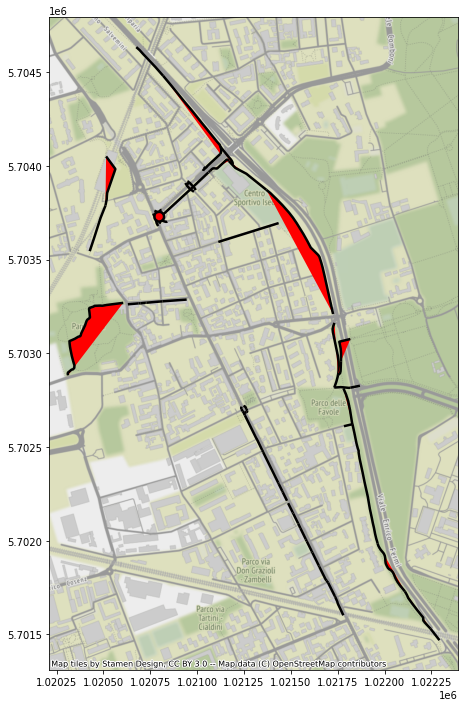

In [ ]:
ax= bikes_affori.to_crs(epsg=3857).plot(figsize=(24,12),facecolor="red",edgecolor="k",linewidth=2.5)
contextily.add_basemap(ax)